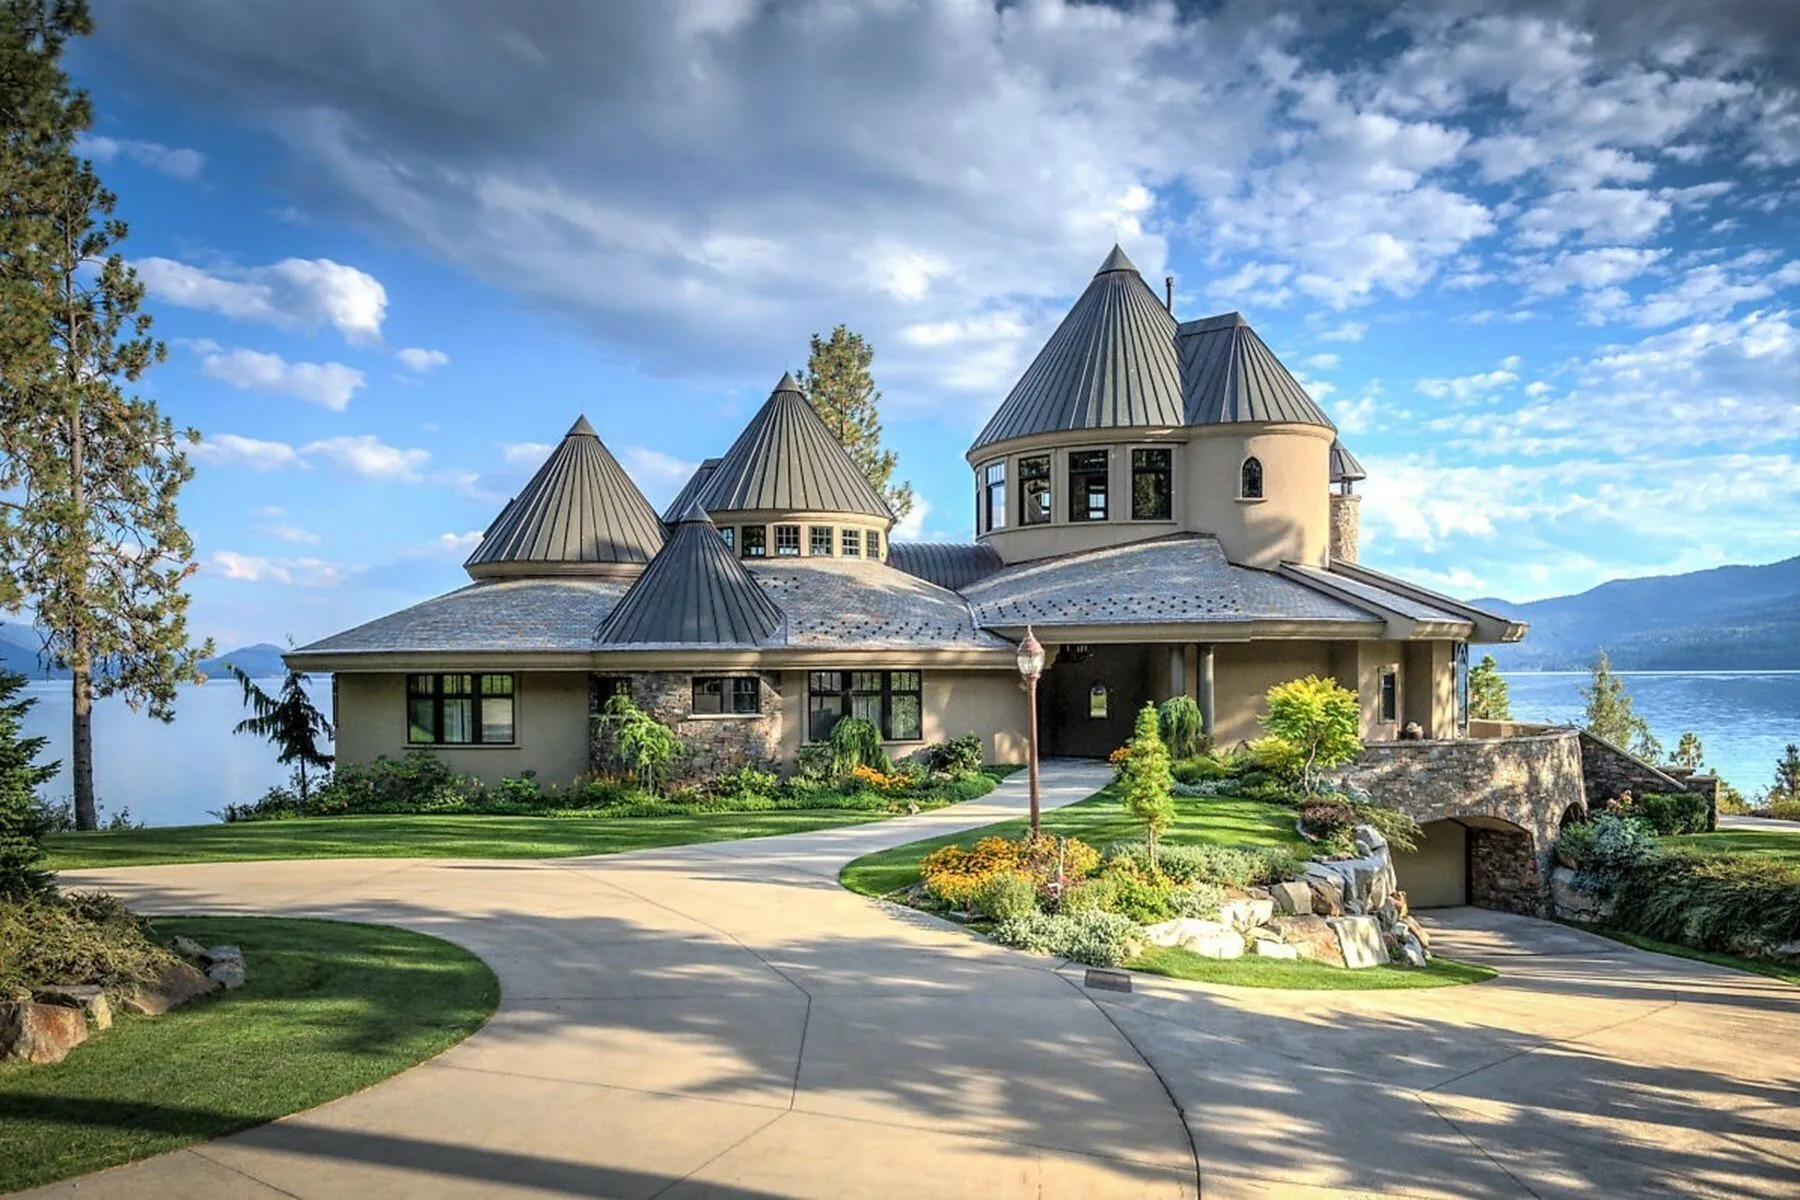

## Dragon Real Estate Price Predictor

# some basic description of the dataset

1. CRIM      per capita crime rate by town2. ZN        proportion of residential land zoned for lots over     
             25,000 sq.f
 3. INDUS     proportion of non-retail business acres per t

 4. CHAS      Charles River dummy variable (= 1 if tract bou ds 
             river; 0 other
   5. NOX       nitric oxides concentration (parts per 10 mi

   6. RM        average number of rooms per dw
   7. AGE       proportion of owner-occupied units built prior 94
    8. DIS       weighted distances to five Boston employmenttr

    9. RAD       index of accessibility to radialh

    10. TAX      full-value property-tax rate p1
0
    11. PTRATIO  pupil-teacher rab
wn
    12. B        1000(Bk - 0.63)^2 where Bk is the p   f         
own
    13. LSTAT    % lower status of po
tion
    14. MEDV     Median value of owner-occupied homes i in $1000's


In [1]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# importing the csv file as a dataframe
housing = pd.read_csv('data.csv')

# displaying first 5 rows of the dataframe
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
# displaying last 5 row of the dataframe
housing.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [4]:
# To give info of the dataframe
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
# from the above info we can see that out of all the coulmns RM has 5 missing values

In [6]:
# Description of the dataframe
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# to show the number of values in different categories
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

from this we can interpret that the number of tracts 
which bound river are 35
which does not bound river are 471

## Graphical analysis

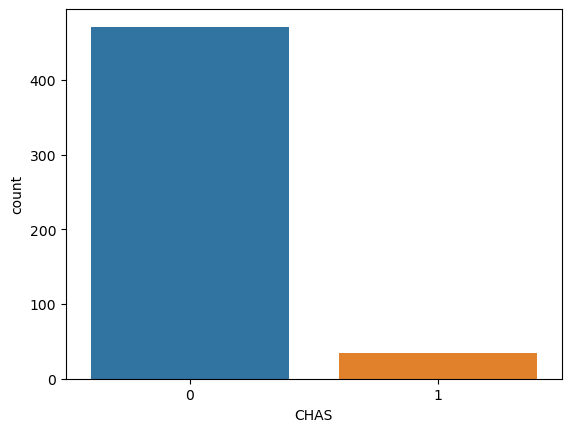

In [8]:
sns.countplot( x = housing.CHAS,data = housing)
plt.show()

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

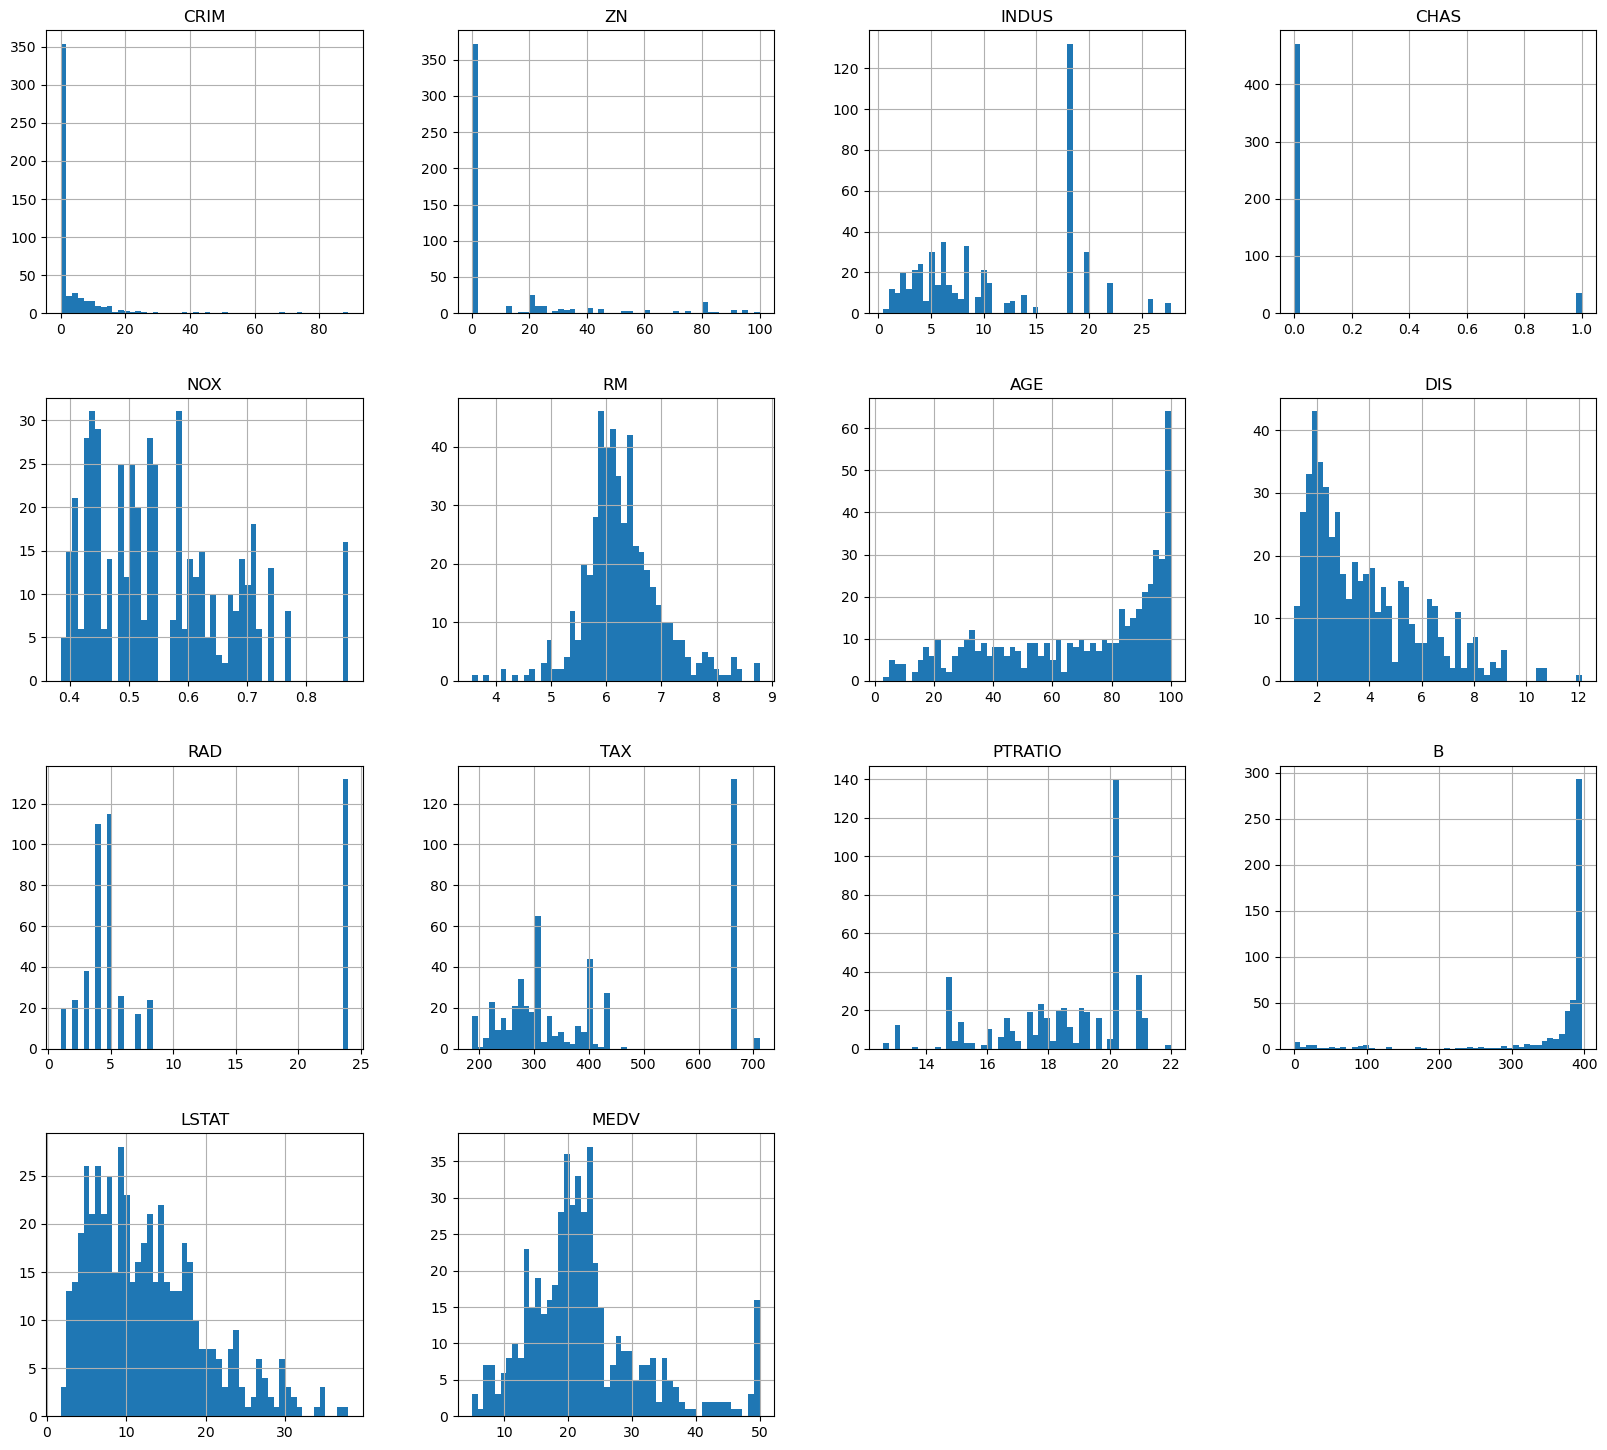

In [9]:
%matplotlib inline
housing.hist(bins = 50 , figsize = (20,18))

## Train- Test - splitting


In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing ,test_size = 0.2, random_state = 42)

In [11]:
X_train = train_set.drop('MEDV',axis = 1)
y_train = train_set['MEDV']
print(X_train)
print(y_train)

         CRIM    ZN  INDUS  CHAS     NOX     RM   AGE     DIS  RAD  TAX  \
477  15.02340   0.0  18.10     0  0.6140  5.304  97.3  2.1007   24  666   
15    0.62739   0.0   8.14     0  0.5380  5.834  56.5  4.4986    4  307   
332   0.03466  35.0   6.06     0  0.4379  6.031  23.3  6.6407    1  304   
423   7.05042   0.0  18.10     0  0.6140  6.103  85.1  2.0218   24  666   
19    0.72580   0.0   8.14     0  0.5380  5.727  69.5  3.7965    4  307   
..        ...   ...    ...   ...     ...    ...   ...     ...  ...  ...   
106   0.17120   0.0   8.56     0  0.5200  5.836  91.9  2.2110    5  384   
270   0.29916  20.0   6.96     0  0.4640  5.856  42.1  4.4290    3  223   
348   0.01501  80.0   2.01     0  0.4350  6.635  29.7  8.3440    4  280   
435  11.16040   0.0  18.10     0  0.7400  6.629  94.6  2.1247   24  666   
102   0.22876   0.0   8.56     0  0.5200  6.405  85.4  2.7147    5  384   

     PTRATIO       B  LSTAT  
477     20.2  349.48  24.91  
15      21.0  395.62   8.47  
332     1

## To solve the problem of missing attributes

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
imputer = SimpleImputer(strategy = 'median')
imputer.fit(X_train)

SimpleImputer(strategy='median')

In [14]:
imputer.statistics_

array([2.61390e-01, 0.00000e+00, 8.56000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.77000e+01, 3.17575e+00, 5.00000e+00, 3.30000e+02,
       1.87000e+01, 3.91305e+02, 1.09250e+01])

In [15]:
X = imputer.transform(X_train)

## Creating a Pipeline 

In [16]:
from sklearn.pipeline import Pipeline

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy = 'median'))
    ,('std_scaler',StandardScaler())])

In [19]:
housing_num_tr = pipeline.fit_transform(X_train)
housing_num_tr

array([[ 1.28770177, -0.50032012,  1.03323679, ...,  0.84534281,
        -0.07433689,  1.75350503],
       [-0.33638447, -0.50032012, -0.41315956, ...,  1.20474139,
         0.4301838 , -0.5614742 ],
       [-0.40325332,  1.01327135, -0.71521823, ..., -0.63717631,
         0.06529747, -0.65159505],
       ...,
       [-0.40547014,  2.95931752, -1.30336132, ..., -0.59225149,
         0.37901005, -0.91069248],
       [ 0.85189733, -0.50032012,  1.03323679, ...,  0.84534281,
        -2.69458597,  1.52257036],
       [-0.38135592, -0.50032012, -0.35216694, ...,  1.15981657,
        -3.12158061, -0.25731635]])

In [20]:
## correlations
corr_Matrix = housing.corr()
corr_Matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.696169
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

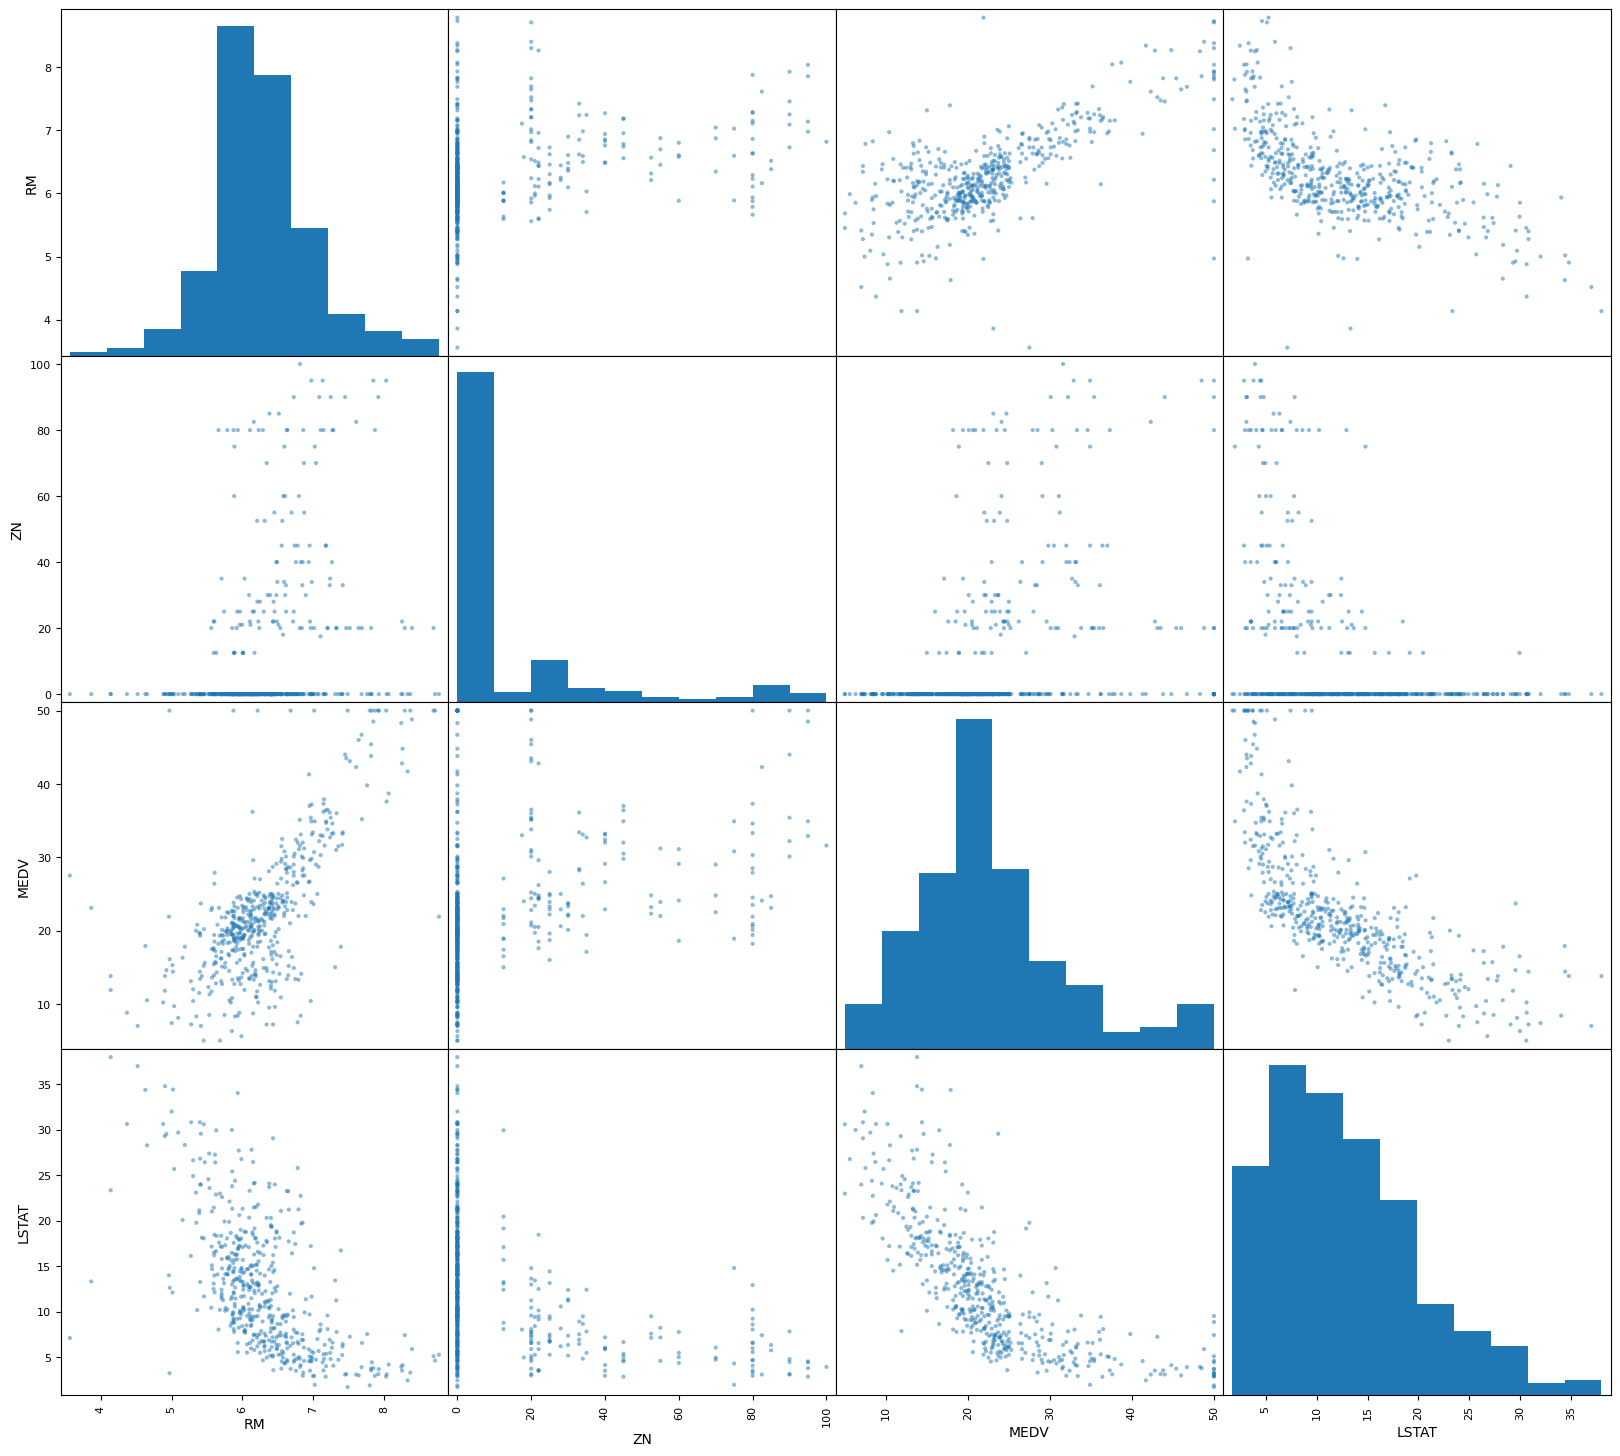

In [21]:
from pandas.plotting import scatter_matrix
attributes = ['RM','ZN','MEDV','LSTAT']
scatter_matrix(housing[attributes],figsize = (20,18))


In [22]:
## graphical analysis through scatter plot

<Axes: xlabel='RM', ylabel='MEDV'>

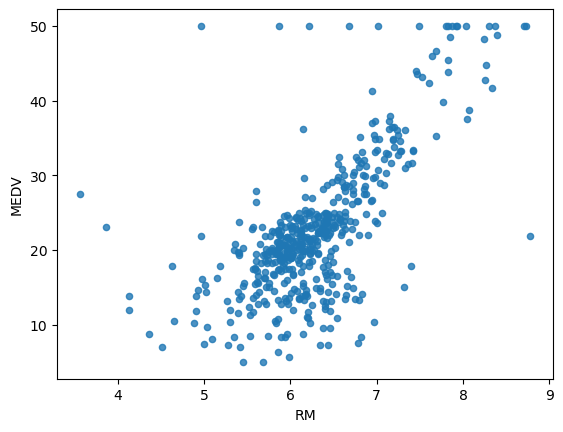

In [23]:
housing.plot(kind = 'scatter',x = 'RM',y = 'MEDV',alpha = 0.8)

## Selecting the desired model 

In [24]:
# importing the models from scikit larn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [25]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

In [26]:
# training the model 
model1 = lr
model2 = dt
model3 = rf
model1.fit(housing_num_tr,y_train)


LinearRegression()

In [27]:
some_data = X_train.iloc[:5]
prepared_data = pipeline.transform(some_data)

predictions = model1.predict(housing_num_tr)


## Testing the model on the test data

In [28]:
from sklearn.metrics import mean_squared_error , r2_score
X_test = test_set.drop('MEDV',axis = 1)
y_test = test_set['MEDV']
X_test_prepared = pipeline.transform(X_test)
y_pred = model1.predict(X_test_prepared)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print('Mean squared error of model1 is : ',mse)
print('Root mean squared error of model1 is : ', rmse)
print('r2_score of the model1 is : ', r2_score(y_test,y_pred))

Mean squared error of model1 is :  24.45524475338338
Root mean squared error of model1 is :  4.945224439131492
r2_score of the model1 is :  0.6665214352855748


In [29]:
model2.fit(housing_num_tr,y_train)
y_pred = model2.predict(X_test_prepared)
print('Mean squared error of model2 is : ',mse)
print('Root mean squared error of model2 is : ', rmse)
print('r2_score of the model2 is : ', r2_score(y_test,y_pred))

Mean squared error of model2 is :  24.45524475338338
Root mean squared error of model2 is :  4.945224439131492
r2_score of the model2 is :  0.8688243340438774


In [30]:
model3.fit(housing_num_tr,y_train)
y_pred = model3.predict(X_test_prepared)
print('Mean squared error of model3 is : ',mse)
print('Root mean squared error of model3 is : ', rmse)
print('r2_score of the model3 is : ', r2_score(y_test,y_pred))

Mean squared error of model3 is :  24.45524475338338
Root mean squared error of model3 is :  4.945224439131492
r2_score of the model3 is :  0.8876824488494015


 from the above testing we can conclude that randomforestregressor will be best suited for our model